### Student Performance Indicator 


Life cycle of machine learning project 

1. understanding the problem statement 
2. data collection 
3. datachecks 
4. eda
5. data preprocess 
6. model training 
7. choose the best model 


### 1) problem statement 

this project understands how the students performance is affected by other variables such as gender ethnicity parental level of education lunch and test preparation course 

### 2 data collection 

kaggle students performances in exams 

8 columns 1000 rows 


2.1 import data and requried packages 


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2.2 loading the dataset

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3 datacheck 

missing values 
duplicates, data type , number of unique values of each column , statistics of the dataset , check various categories present in the diffreent categorical column 


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### exploring data 


In [16]:
print('categories in gender variable ',end="")
print(df['gender'].unique())

print('categories in race variable ',end="")
print(df['race_ethnicity'].unique())

print('categories in parent education variable ',end="")
print(df['parental_level_of_education'].unique())

print('categories in lunch variable ',end="")
print(df['lunch'].unique())

print('categories in test prep course variable ',end="")
print(df['test_preparation_course'].unique())


categories in gender variable ['female' 'male']
categories in race variable ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parent education variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable ['standard' 'free/reduced']
categories in test prep course variable ['none' 'completed']


In [17]:
## defining numerical and cateogrical features 


numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

## print column 

print(len(numerical_features),numerical_features)
print(len(categorical_features),categorical_features)


3 ['math_score', 'reading_score', 'writing_score']
5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 adding colums for Total score and average


In [19]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print('numer of student with full marks in reading',reading_full)
print('numer of student with full marks in writing',writing_full)
print('numer of student with full marks in reading',math_full)

numer of student with full marks in reading 17
numer of student with full marks in writing 14
numer of student with full marks in reading 7


### data visualisation 

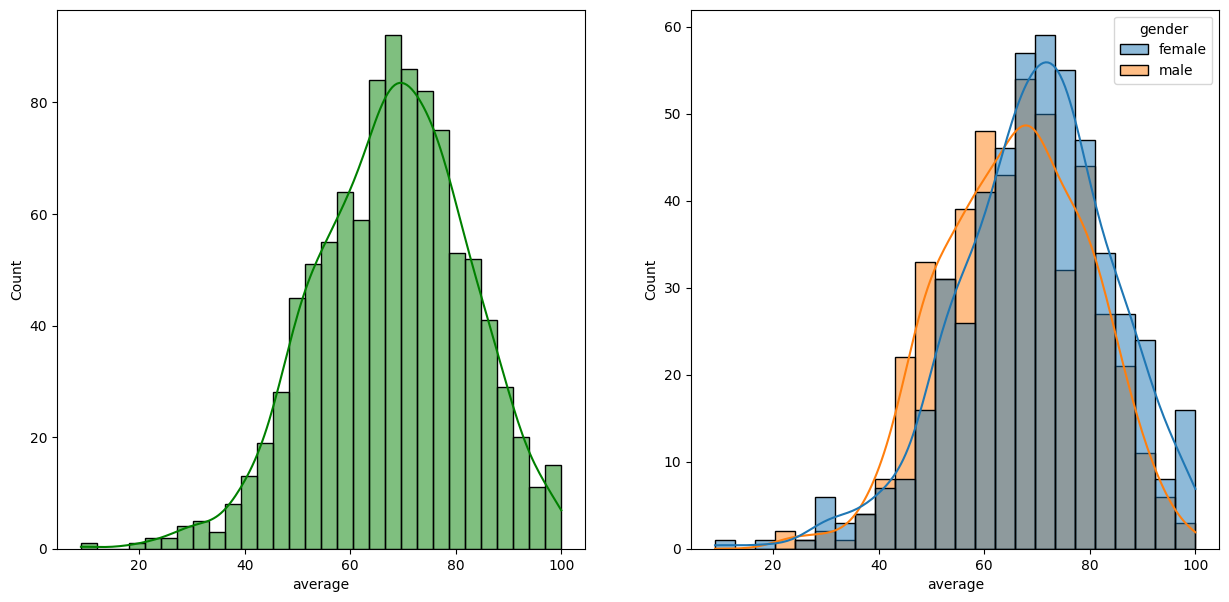

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

insights female score higher than males 

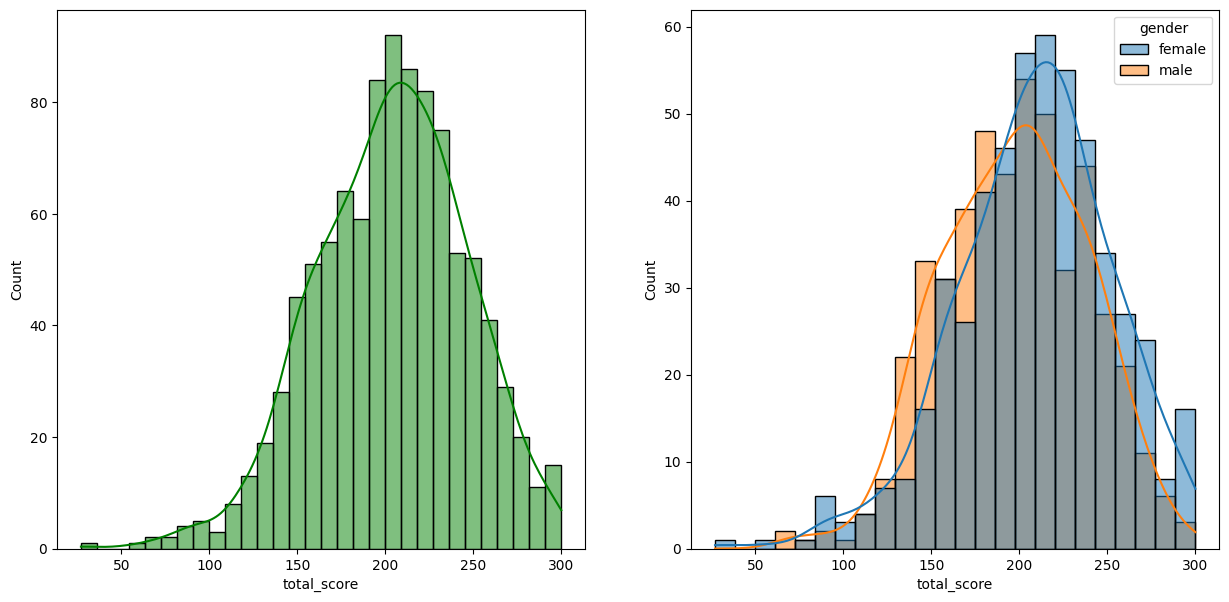

In [23]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

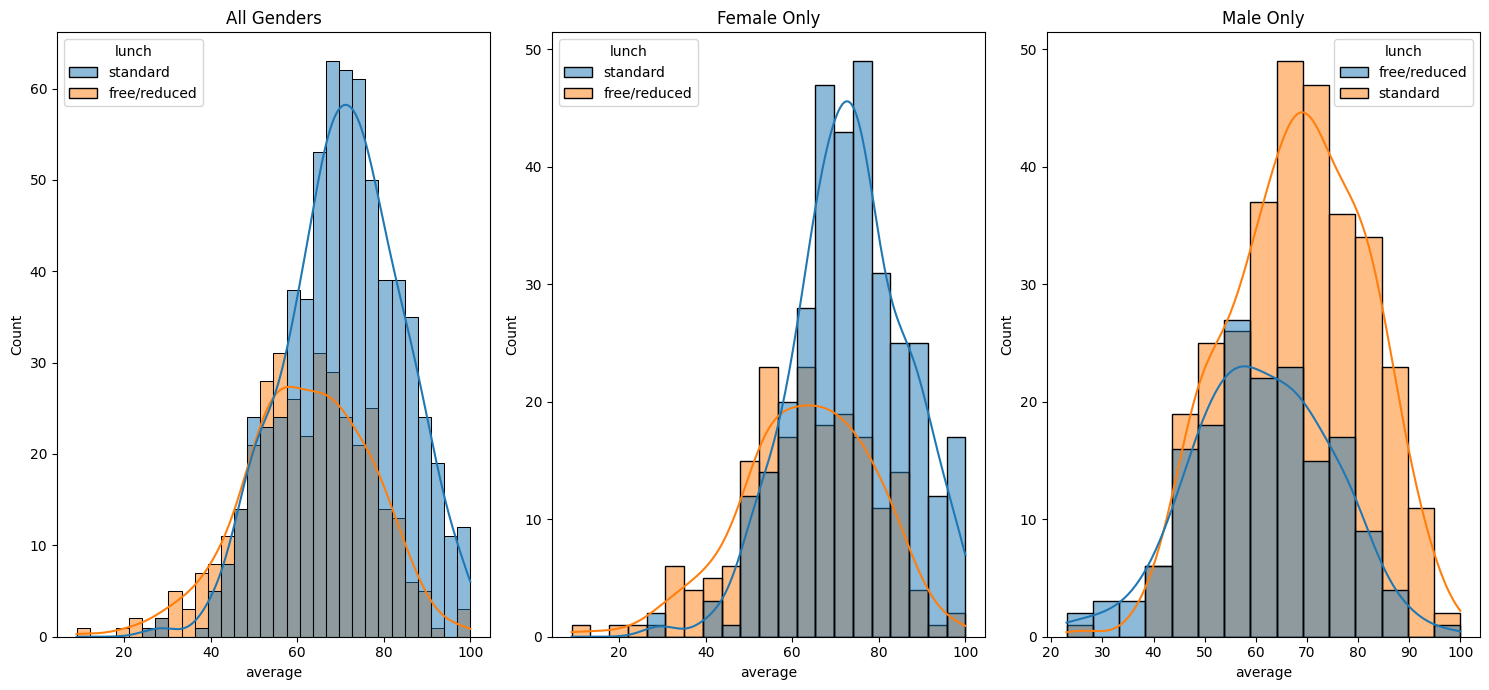

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots in 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# Plot the histogram for all data on the first subplot (axs[0])
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('All Genders')

# Plot the histogram for females on the second subplot (axs[1])
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Only')

# Plot the histogram for males on the third subplot (axs[2])
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Only')

plt.tight_layout()
plt.show()
